# Spherical Mean Models

Finally, we also have spherical mean models that don't fit the 3D DWI signal, but only the 1D spherical mean signal over b-value.
- Spherical mean of the Stick model.
- Spherical mean of the Zeppelin model.
- Spherical mean of the restricted Zeppelin model.

The idea of Spherical Mean models is to fit the spherical mean of a model to the spherical mean of the data, rather than fitting the separate DWIs per shell. As such, spherical mean models have no concept of orientation, dispersion or crossings. *(Kaden et al. 2015)* first pioneered the spherical mean technique by providing the analytic expression of the Zeppelin model. Later, *(Kaden et al. 2016)* combined the spherical mean model of a Zeppelin and Stick model to create his multi-compartment spherical mean technique.

The spherical mean of the restricted Zeppelin *(Burcaw et al. 2015)* has not been published anywhere as far as we know, but Dmipy provides it anyway.

## Spherical Mean of C1 Stick model

In [1]:
from dmipy.signal_models import spherical_mean_models
from dmipy.core.acquisition_scheme import acquisition_scheme_from_bvalues
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# notice that this model only has one parameter
sm_stick = spherical_mean_models.C1StickSphericalMean()
sm_stick.parameter_names

['lambda_par']

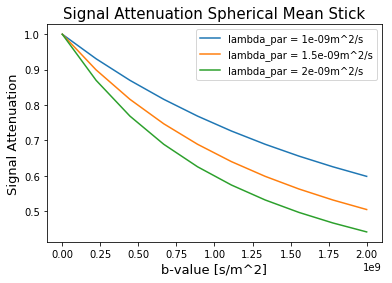

In [2]:
# we make a dummy scheme with one sample per shell.
samples = 10
bvalues = np.linspace(0, 2e9, samples)
bvectors = np.tile([0, 0, 1], (samples, 1))
delta = 1e-2
Delta = 3e-2
scheme = acquisition_scheme_from_bvalues(bvalues, bvectors, delta, Delta)

for lambda_par in [1e-9, 1.5e-9, 2e-9]:
    plt.plot(bvalues, sm_stick(scheme, lambda_par=lambda_par),
             label='lambda_par = {}m^2/s'.format(lambda_par))
plt.legend()
plt.xlabel('b-value [s/m^2]', fontsize=13)
plt.ylabel('Signal Attenuation', fontsize=13)
plt.title('Signal Attenuation Spherical Mean Stick', fontsize=15);

It can be seen that larger parallel diffusivity results in faster signal attenuation in the spherical mean Stick model. Remember that orientation is irrelevant in these models, so the restricted perpendicular signal and Gaussian parallel signal are both contained in the spherical mean signal.

## Spherical Mean of G2 Zeppelin model

The spherical mean model of the Zeppelin has the same intuition as the Stick model. Larger diffusivities will result in faster attenuation.

In [3]:
sm_zeppelin = spherical_mean_models.G2ZeppelinSphericalMean()
sm_zeppelin.parameter_names

['lambda_perp', 'lambda_par']

## Spherical Mean of G3 Restricted Zeppelin model

The spherical mean model of the restricted zeppelin has not been used in microstructure imaging so far, but it could have merit for future research. See the [Gaussian models](https://github.com/AthenaEPI/mipy/blob/master/examples/example_gaussian_models.ipynb) example for an in-depth explanation.

In [4]:
sm_restricted_zeppelin = spherical_mean_models.G3RestrictedZeppelinSphericalMean()
sm_restricted_zeppelin.parameter_names

['A', 'lambda_inf', 'lambda_par']

## References
- Kaden, Enrico, Frithjof Kruggel, and Daniel C. Alexander. "Quantitative mapping of the per‐axon diffusion coefficients in brain white matter." Magnetic resonance in medicine 75.4 (2016): 1752-1763.
- Kaden, Enrico, et al. "Multi-compartment microscopic diffusion imaging." NeuroImage 139 (2016): 346-359.
- Burcaw, Lauren M., Els Fieremans, and Dmitry S. Novikov. "Mesoscopic structure of neuronal tracts from time-dependent diffusion." NeuroImage 114 (2015): 18-37.